In [311]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.arange(0, 10, .1)
y = np.sin(x)

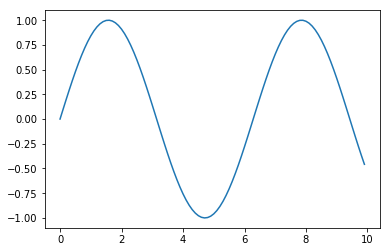

In [3]:
plt.plot(x, y)
plt.show()

In [949]:
class MyRNN(nn.Module):
    def __init__(self, input_size, hidden_size, nonlinearity=torch.tanh, **kwargs):
        super().__init__()
        self.hidden_size = hidden_size
        self.w_hh = self.xavier_init([hidden_size, hidden_size])
        self.b_ih = nn.Parameter(torch.zeros([1, hidden_size], requires_grad=True))
        
        self.w_ih = self.xavier_init([input_size, hidden_size])
        self.V = self.xavier_init([hidden_size, hidden_size])
        self.b_hh = nn.Parameter(torch.zeros([1, hidden_size], requires_grad=True))
        self.nonlinearity = nonlinearity
    
    def forward(self, x):
        seq_size = x.size(0)
        self.h = torch.zeros([1, self.hidden_size], requires_grad=True)
        for i in range(seq_size):
            self.a = self.h@self.w_hh + x[i]*self.w_ih + self.b_ih
            self.h = self.nonlinearity(self.a)
            self.o = self.b_hh + self.h@self.V
        return self.o, self.h
    
    def xavier_init(self, size):
        return torch.nn.Parameter(torch.autograd.Variable(
            nn.init.xavier_normal_(torch.empty(*size)),
            requires_grad=True
        ))
n = MyRNN(1, 5)
n(data[0:10, :].permute(1, 0).view(sq, -1, 1))

(tensor([[ 0.0298, -0.0699,  0.0535, -0.0190,  0.0137],
         [ 0.0486, -0.1176,  0.0884, -0.0471,  0.0293],
         [ 0.0673, -0.1648,  0.1229, -0.0748,  0.0447],
         [ 0.0856, -0.2114,  0.1569, -0.1020,  0.0598],
         [ 0.1036, -0.2572,  0.1901, -0.1286,  0.0746],
         [ 0.1212, -0.3019,  0.2224, -0.1545,  0.0890],
         [ 0.1382, -0.3456,  0.2538, -0.1794,  0.1030],
         [ 0.1546, -0.3880,  0.2840, -0.2033,  0.1164],
         [ 0.1705, -0.4290,  0.3130, -0.2261,  0.1294],
         [ 0.1858, -0.4685,  0.3407, -0.2478,  0.1417]],
        grad_fn=<ThAddBackward>),
 tensor([[ 0.0298,  0.0523, -0.0812, -0.0771,  0.0277],
         [ 0.0723,  0.0548, -0.1144, -0.1086,  0.0268],
         [ 0.1142,  0.0574, -0.1474, -0.1398,  0.0260],
         [ 0.1552,  0.0601, -0.1800, -0.1706,  0.0253],
         [ 0.1951,  0.0630, -0.2122, -0.2010,  0.0245],
         [ 0.2336,  0.0661, -0.2439, -0.2308,  0.0239],
         [ 0.2706,  0.0695, -0.2751, -0.2600,  0.0233],
         [ 0.

In [950]:
class MyGRU(nn.Module):
    def __init__(self, input_size, hidden_size, nonlinearity=torch.tanh, **kwargs):
        super().__init__()
        self.hidden_size = hidden_size
        self.w_z = self.xavier_init([hidden_size, hidden_size])
        self.w_r = self.xavier_init([hidden_size, hidden_size])
        self.w_h = self.xavier_init([hidden_size, hidden_size])
        self.w_y = self.xavier_init([hidden_size, hidden_size])
        
        self.u_z = self.xavier_init([input_size, hidden_size])
        self.u_r = self.xavier_init([input_size, hidden_size])
        self.u_h = self.xavier_init([input_size, hidden_size])
        
        self.b_z = nn.Parameter(torch.zeros([1, hidden_size], requires_grad=True))
        self.b_r = nn.Parameter(torch.zeros([1, hidden_size], requires_grad=True))
        self.b_h = nn.Parameter(torch.zeros([1, hidden_size], requires_grad=True))
        self.b_y = nn.Parameter(torch.zeros([1, hidden_size], requires_grad=True))

        self.nonlinearity = nonlinearity
    
    def forward(self, x):
        seq_size = x.size(0)
        self.h = torch.zeros([1, self.hidden_size], requires_grad=True)
        
        for i in range(seq_size):
            z = torch.sigmoid(x[i]*self.u_z + self.h@self.w_z + self.b_z)
            r = torch.sigmoid(x[i]*self.u_r + self.h@self.w_r + self.b_r)
            h_new = torch.tanh(x[i]*self.u_h + (r*self.h)@self.w_h + self.b_h)
            
            self.h = (1 - z) * self.h + z * h_new
            self.o = self.h@self.w_y + self.b_y
            
        return self.o, self.h
    
    def xavier_init(self, size):
        return nn.Parameter(torch.autograd.Variable(
            nn.init.xavier_normal_(torch.empty(*size)),
            requires_grad=True
        ))
n = MyGRU(1, 5)
n(data[0:10, :].permute(1, 0).view(sq, -1, 1))

(tensor([[ 0.0094,  0.0145, -0.1599, -0.0854, -0.0201],
         [ 0.0133,  0.0313, -0.2304, -0.1159, -0.0331],
         [ 0.0167,  0.0461, -0.2958, -0.1387, -0.0432],
         [ 0.0197,  0.0590, -0.3548, -0.1545, -0.0502],
         [ 0.0227,  0.0700, -0.4071, -0.1648, -0.0540],
         [ 0.0258,  0.0791, -0.4529, -0.1710, -0.0551],
         [ 0.0289,  0.0863, -0.4928, -0.1743, -0.0537],
         [ 0.0321,  0.0916, -0.5275, -0.1759, -0.0503],
         [ 0.0353,  0.0950, -0.5578, -0.1764, -0.0453],
         [ 0.0384,  0.0966, -0.5842, -0.1765, -0.0392]],
        grad_fn=<ThAddBackward>),
 tensor([[-0.2768,  0.0471, -0.0074, -0.1648,  0.1985],
         [-0.4023,  0.0643,  0.0055, -0.2424,  0.2919],
         [-0.5125,  0.0802,  0.0173, -0.3078,  0.3777],
         [-0.6059,  0.0951,  0.0270, -0.3615,  0.4549],
         [-0.6829,  0.1095,  0.0340, -0.4048,  0.5235],
         [-0.7452,  0.1234,  0.0379, -0.4392,  0.5841],
         [-0.7948,  0.1369,  0.0386, -0.4664,  0.6373],
         [-0.

In [1026]:
sq = 4
def create_dataset(nums, y, batch_size=sq):
    batches = []
    targets = []
    for i in range(0+batch_size, len(nums)):
        batch = nums[i-batch_size:i]
        target = y[i]
        batches.append(batch)
        targets.append(target)
    return batches, targets

data, targets = create_dataset(x, y, batch_size=sq)
data = np.asarray(data)
targets = np.asarray(targets)
data = torch.autograd.Variable(torch.Tensor(data), requires_grad=False)
targets = torch.autograd.Variable(torch.Tensor(targets), requires_grad=False)

class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gru = MyGRU(1, 1, num_layers=1, batch_first=False)
    def forward(self, input):
        input = input.permute(1, 0).view(sq, -1, 1)
        output, hidden = self.gru(input)
        
        return hidden
        
model = MyModel()
optim = torch.optim.RMSprop(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

In [1027]:
for i in range(1000):
    optim.zero_grad()
    loss = criterion(model(data), targets.view(-1, 1))
    if i % 100 == 0:
        print(i, loss.item())
    loss.backward()
    optim.step()

0 0.875205397605896
100 0.3248729407787323
200 0.27816644310951233
300 0.2403561770915985
400 0.21625037491321564
500 0.20399761199951172
600 0.1976916491985321
700 0.19357292354106903
800 0.19048726558685303
900 0.180766299366951


In [1028]:
for param_group in optim.param_groups:
    param_group['lr'] = 1

In [1029]:
preds = model(data).view(-1)
len(preds), preds.size()

(96, torch.Size([96]))

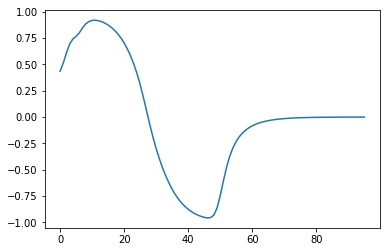

In [1030]:
plt.plot(np.arange(len(preds)), preds.view(-1).data.numpy())
plt.show()

In [944]:
a,b,c = [], [], []
for i, batch in enumerate(data):
    a.append(batch[-1] + 0.1)
    b.append(model(batch.view(1, -1)).view(-1))
    # print(model(batch.view(1, 1, 8)))
    c.append(targets[i])

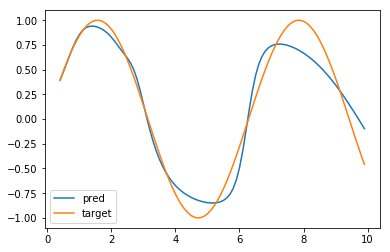

In [945]:
plt.plot(a, b, label="pred")
plt.plot(a, c, label="target")
plt.legend()
plt.show()